In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
fp = "kalki_movie_reviews.csv"
df = pd.read_csv(fp)

In [5]:
df.head()

,Comments,Ratings
0,"I didnt go in with big hopes, but i was expect...",8
1,"A unique genre, a well written story (script) ...",8
2,"Majestic at scale, grandeur in VFX, and great ...",9
3,"""Kalki 2898"" is not just a movie; it's an expe...",10
4,Best Indian movie Nagi combined Hindu mytholog...,10


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Comments  5000 non-null   object
 1   Ratings   5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.3+ KB


In [9]:
df.describe()

,Ratings
count,5000.000000
mean,8.160000
std,2.166873
min,1.000000
25%,8.000000
50%,9.000000
75%,10.000000
max,10.000000


In [11]:
df['Ratings'].value_counts()

Ratings
10    1800
8     1200
9      800
6      600
4      200
7      200
1      200
Name: count, dtype: int64

In [61]:
df['Sentiment'] = np.where(df['Ratings'] <= 5, 'Bad', 'Good')
df.head()

,Comments,Ratings,Sentiment
0,"I didnt go in with big hopes, but i was expect...",8,Good
1,"A unique genre, a well written story (script) ...",8,Good
2,"Majestic at scale, grandeur in VFX, and great ...",9,Good
3,"""Kalki 2898"" is not just a movie; it's an expe...",10,Good
4,Best Indian movie Nagi combined Hindu mytholog...,10,Good


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17084\3890817939.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Ratings', data=df, palette='viridis')


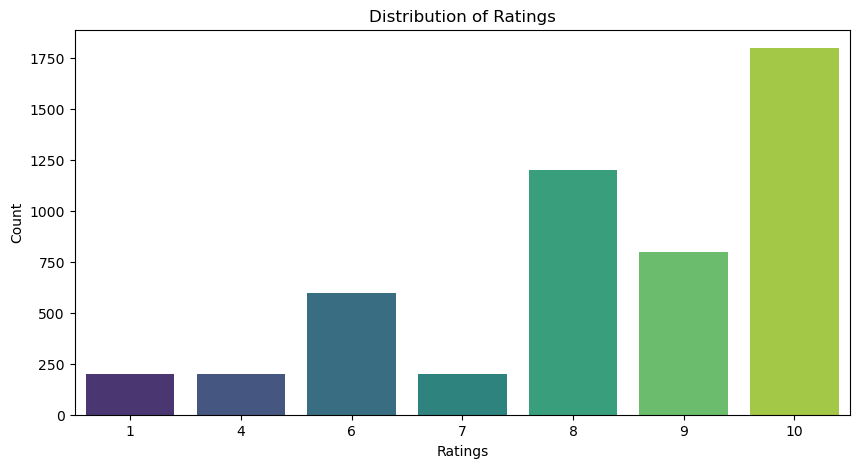

In [67]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Ratings', data=df, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17084\3688242647.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='viridis')


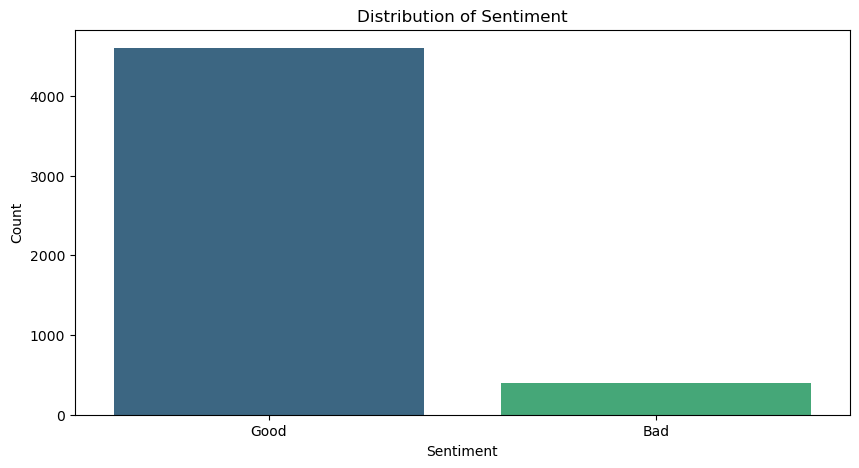

In [69]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [71]:
x = df['Comments']
y = df['Sentiment']

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [91]:
vector = CountVectorizer(stop_words='english')
x_train_vectorized = vector.fit_transform(x_train)
x_test_vectorized = vector.transform(x_test)

In [93]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train_vectorized, y_train)

LogisticRegression(max_iter=1000)

In [95]:
y_pred = model.predict(x_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [97]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[ 88   0]
 [  0 912]]

Classification Report:
              precision    recall  f1-score   support

         Bad       1.00      1.00      1.00        88
        Good       1.00      1.00      1.00       912

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



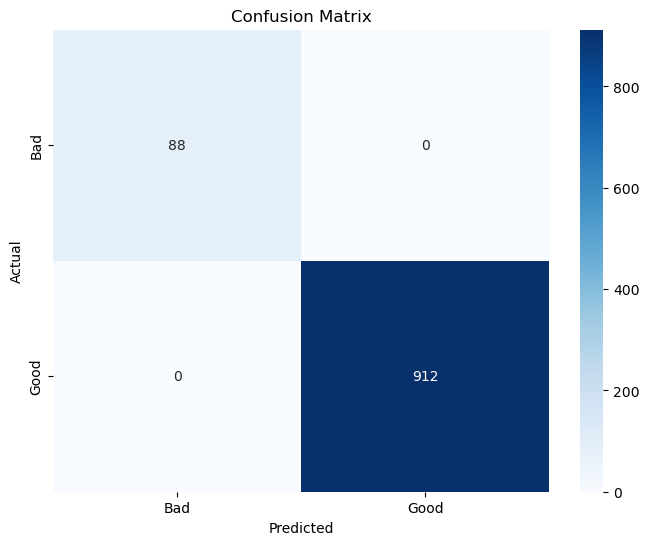

In [99]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()